##**Project Title :** **Stock Market Price Prediction**

##**Problem Statement**

The dataset comprises historical daily prices for stocks and ETFs traded on NASDAQ, sourced from Yahoo Finance through the yfinance Python package. Spanning up to April 1, 2020, it includes essential fields such as opening and closing prices, highs and lows, adjusted close prices, and trading volumes. Organized into ETFs and stocks folders, each file is named after the corresponding ticker symbol. Additional metadata, such as full names, is available in symbols_valid_meta.csv. The dataset prompts exploration of diverse problem statements, including stock price prediction, market trend analysis, volatility prediction, trading strategy optimization, sector-wise performance analysis, external factors' impact, ETF flow prediction, and risk analysis. These tasks cater to researchers, analysts, and machine learning practitioners keen on deciphering financial market dynamics.

##**Dataset**

Date - specifies trading date

Open - opening price

High - maximum price during the day

Low - minimum price during the day

Close - close price adjusted for splits

Adj Close - adjusted close price adjusted for both dividends and splits.

Volume - the number of shares that changed hands during a given day


In [ ]:
#import library
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense,Dropout
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Interview question solved /Deep learning learning/Models/Dataset/Google_Stock_Price_Train.csv')

In [ ]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [ ]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

##**EDA**

Text(0.5, 1.0, 'Open Price')

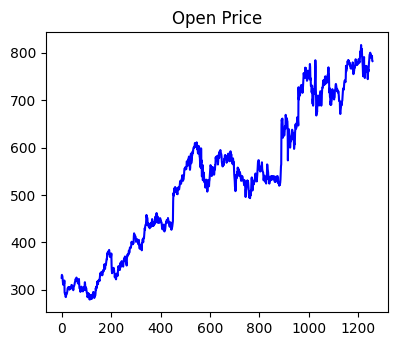

In [ ]:
# Open
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.plot(df['Open'], color='blue')
plt.title('Open Price')

Text(0.5, 1.0, 'High Price')

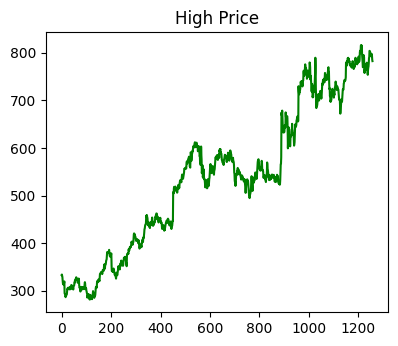

In [ ]:
# High
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 2)
plt.plot(df['High'], color='green')
plt.title('High Price')

Text(0.5, 1.0, 'Low Price')

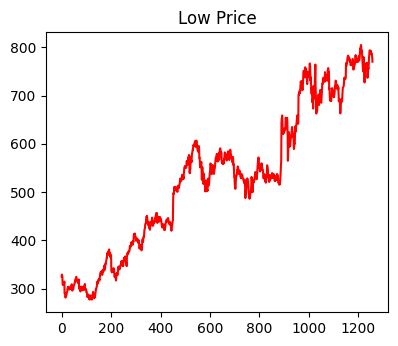

In [ ]:
# Low
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 3)
plt.plot(df['Low'], color='red')
plt.title('Low Price')

##**convert date object into datetime**

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

##**Setting date as index**

In [ ]:
df.set_index('Date',inplace=True)

In [ ]:
# Remove commas and convert to float
df['Close'] = df['Close'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
# Use only the 'Close' prices for simplicity
data = df['Close'].values.reshape(-1, 1)

##**Feature Scaling**

In [ ]:
# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

In [ ]:
# Prepare data for training
sequence_length = 10  # You can adjust this based on your preference
X, y = [], []

for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length, 0])
    y.append(data_scaled[i + sequence_length, 0])

X, y = np.array(X), np.array(y)

In [ ]:
# Reshape data for RNN input (samples, time steps, features)
X = X.reshape(X.shape[0], X.shape[1], 1)

##**Split train test**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##**Model Architecture**

In [ ]:
# Build the RNN model
regressor = Sequential()

# Adding the first RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50, activation='tanh', return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth RNN layer and some Dropout regularisation
regressor.add(SimpleRNN(units=50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
32/32 [==============================] - 5s 12ms/step - loss: 0.2209
Epoch 2/100
32/32 [==============================] - 0s 13ms/step - loss: 0.1236
Epoch 3/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0810
Epoch 4/100
32/32 [==============================] - 0s 13ms/step - loss: 0.0677
Epoch 5/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0577
Epoch 6/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0386
Epoch 7/100
32/32 [==============================] - 0s 12ms/step - loss: 0.0345
Epoch 8/100
32/32 [==============================] - 1s 26ms/step - loss: 0.0260
Epoch 9/100
32/32 [==============================] - 1s 29ms/step - loss: 0.0248
Epoch 10/100
32/32 [==============================] - 1s 28ms/step - loss: 0.0216
Epoch 11/100
32/32 [==============================] - 1s 25ms/step - loss: 0.0179
Epoch 12/100
32/32 [==============================] - 1s 21ms/step - loss: 0.0168
Epoch 13/100
32/32 [=====

In [ ]:
# Make predictions on the test set
predictions = regressor.predict(X_test)

8/8 [==============================] - 1s 4ms/step


In [ ]:
# Inverse transform the predictions to the original scale
predictions_inv = scaler.inverse_transform(predictions.reshape(-1, 1))

In [ ]:
# Inverse transform the actual values to the original scale
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Evaluate the model on the test set
loss = regressor.evaluate(X_test, y_test)
print(f"Test Loss: {loss}")

8/8 [==============================] - 1s 6ms/step - loss: 0.0010
Test Loss: 0.0010325531475245953


In [ ]:
# Additional Evaluation Metrics
mae = mean_absolute_error(y_test_inv, predictions_inv)
mse = mean_squared_error(y_test_inv, predictions_inv)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 10.257455942382816
Mean Squared Error (MSE): 543.6793617190109


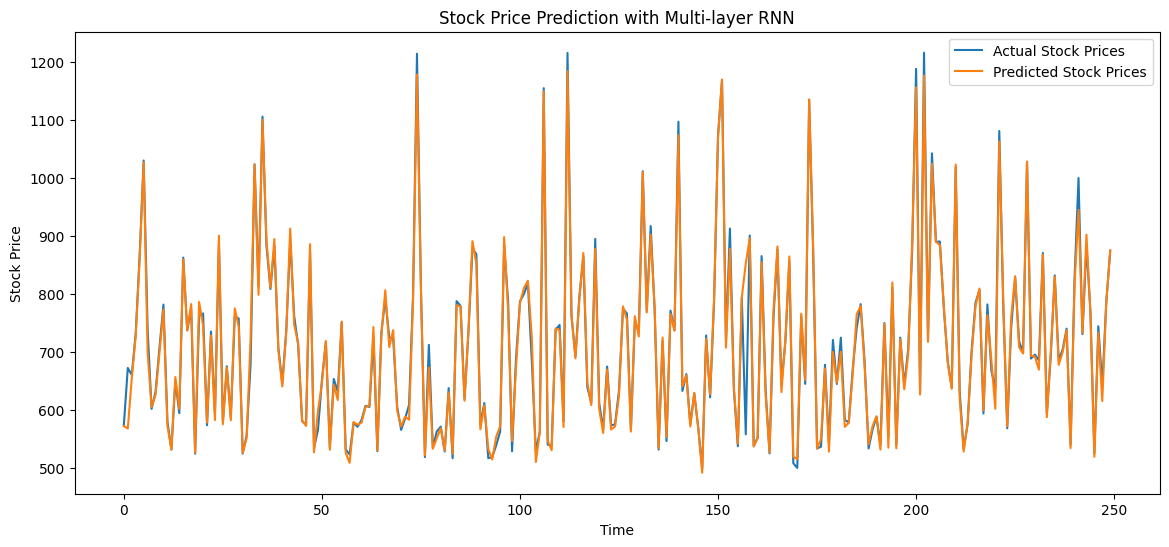

In [ ]:
# Visualize the results
plt.figure(figsize=(14, 6))
plt.plot(y_test_inv, label='Actual Stock Prices')
plt.plot(predictions_inv, label='Predicted Stock Prices')
plt.title('Stock Price Prediction with Multi-layer RNN')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

##**Conclusion:**

The stock price prediction model achieved a low test loss of 0.0010, indicating accurate forecasting performance. With a Mean Absolute Error (MAE) of 10.26 and Mean Squared Error (MSE) of 543.68, the model's predictions closely align with actual stock prices. These results position the model as a valuable tool for investors and analysts, aiding in strategic decision-making and risk management.